# Análisis de Datos de Comercio Electrónico
## Gráficos de Barras, Boxplot y Series Temporales

En este notebook vamos a:
1. Cargar datos reales de comercio electrónico desde commerce.xlsx
2. Analizar ventas por categoría, precios y tendencias temporales
3. Crear visualizaciones: barras, boxplot y series temporales

In [22]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

## 1. Cargar Datos desde Excel

Vamos a cargar el archivo commerce.xlsx con los datos de ventas.

In [27]:
# Cargar datos desde Excel
ruta_archivo = r'c:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\raw\commerce.xlsx'

# Verificar si el archivo existe
print(f"Verificando ruta: {ruta_archivo}")
print(f"¿Archivo existe? {os.path.exists(ruta_archivo)}")

if os.path.exists(ruta_archivo):
    df = pd.read_excel(ruta_archivo)
    print(f"✓ DATOS CARGADOS DESDE ARCHIVO EXCEL: {ruta_archivo}")
else:
    # Listar archivos en el directorio data para ayudar a encontrar el archivo
    directorio_data = os.path.dirname(ruta_archivo)
    if os.path.exists(directorio_data):
        archivos = os.listdir(directorio_data)
        print(f"\n⚠ ARCHIVO NO ENCONTRADO")
        print(f"Archivos disponibles en {directorio_data}:")
        for archivo in archivos:
            print(f"  - {archivo}")
    else:
        print(f"\n⚠ El directorio {directorio_data} no existe")
    
    # Intentar cargar desde variable en memoria como fallback
    if 'datos_comercio' in globals():
        df = pd.DataFrame(datos_comercio)
        print("\n⚠ USANDO DATOS DESDE VARIABLE EN MEMORIA (NO desde archivo)")
    else:
        raise FileNotFoundError(
            f"❌ Archivo no encontrado en {ruta_archivo}\n"
            f"Por favor, asegúrate de que el archivo commerce.xlsx existe en la carpeta 'data'"
        )

# Convertir la columna 'date' a datetime si no lo está
df['date'] = pd.to_datetime(df['date'])

# Ordenar por fecha
df = df.sort_values('date').reset_index(drop=True)

print(f"\n{'='*80}")
print(f"Dataset cargado con {len(df)} registros")
print(f"Período: {df['date'].min().date()} a {df['date'].max().date()}")
print(f"{'='*80}")
print("\nPrimeras filas:")
display(df.head(10))

print("\nÚltimas filas:")
display(df.tail(10))

Verificando ruta: c:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\raw\commerce.xlsx
¿Archivo existe? True
✓ DATOS CARGADOS DESDE ARCHIVO EXCEL: c:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\raw\commerce.xlsx

Dataset cargado con 120 registros
Período: 2025-05-27 a 2025-09-23

Primeras filas:
✓ DATOS CARGADOS DESDE ARCHIVO EXCEL: c:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\raw\commerce.xlsx

Dataset cargado con 120 registros
Período: 2025-05-27 a 2025-09-23

Primeras filas:


,order_id,date,customer_id,product_category,price,quantity,discount,total_amount,payment_method,delivery_days,returned
0,ORD1000,2025-05-27,C679,Ropa,412.99,4,0.05,1569.36,PayPal,0,0
1,ORD1001,2025-05-28,C330,Alimentos,657.33,3,0.15,1676.19,PayPal,3,0
2,ORD1002,2025-05-29,C980,Alimentos,370.98,2,0.00,741.96,PayPal,3,0
3,ORD1003,2025-05-30,C673,Deporte,36.29,1,0.00,36.29,Tarjeta,7,0
4,ORD1004,2025-05-31,C903,Hogar,748.98,3,0.00,2246.94,PayPal,4,0
5,ORD1005,2025-06-01,C632,Deporte,410.18,1,0.10,369.16,Transferencia,4,0
6,ORD1006,2025-06-02,C731,Alimentos,50.50,2,0.00,101.00,PayPal,0,1
7,ORD1007,2025-06-03,C292,Alimentos,262.84,1,0.00,262.84,Transferencia,2,0
8,ORD1008,2025-06-04,C154,Deporte,657.37,3,0.00,1972.11,Tarjeta,3,0
9,ORD1009,2025-06-05,C470,Alimentos,696.40,4,0.15,2367.76,Tarjeta,1,0



Últimas filas:


,order_id,date,customer_id,product_category,price,quantity,discount,total_amount,payment_method,delivery_days,returned
110,ORD1110,2025-09-14,C597,Hogar,770.66,4,0.00,3082.64,Tarjeta,4,0
111,ORD1111,2025-09-15,C930,Alimentos,768.86,4,0.05,2921.67,PayPal,2,0
112,ORD1112,2025-09-16,C573,Hogar,259.45,2,0.10,467.01,Tarjeta,1,0
113,ORD1113,2025-09-17,C888,Electrónica,608.30,2,0.00,1216.60,Transferencia,3,0
114,ORD1114,2025-09-18,C539,Alimentos,413.25,1,0.00,413.25,PayPal,8,0
115,ORD1115,2025-09-19,C172,Electrónica,394.80,2,0.00,789.60,Tarjeta,5,0
116,ORD1116,2025-09-20,C807,Hogar,582.22,3,0.00,1746.66,PayPal,3,0
117,ORD1117,2025-09-21,C864,Electrónica,619.67,3,0.00,1859.01,Transferencia,6,0
118,ORD1118,2025-09-22,C327,Electrónica,261.90,2,0.00,523.80,Tarjeta,3,0
119,ORD1119,2025-09-23,C703,Alimentos,400.53,3,0.05,1141.51,Tarjeta,2,0


## 2. Exploración de Datos

In [28]:
# Información general
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(df.info())

print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
print(df.describe())

print("\n" + "=" * 80)
print("DISTRIBUCIÓN POR CATEGORÍA")
print("=" * 80)
print(df['product_category'].value_counts())

print("\n" + "=" * 80)
print("DISTRIBUCIÓN POR MÉTODO DE PAGO")
print("=" * 80)
print(df['payment_method'].value_counts())

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          120 non-null    object        
 1   date              120 non-null    datetime64[ns]
 2   customer_id       120 non-null    object        
 3   product_category  120 non-null    object        
 4   price             120 non-null    float64       
 5   quantity          120 non-null    int64         
 6   discount          120 non-null    float64       
 7   total_amount      120 non-null    float64       
 8   payment_method    120 non-null    object        
 9   delivery_days     120 non-null    int64         
 10  returned          120 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 10.4+ KB
None

ESTADÍSTICAS DESCRIPTIVAS
                      date       price    quant

## 3. Gráfico de Barras: Ventas por Categoría

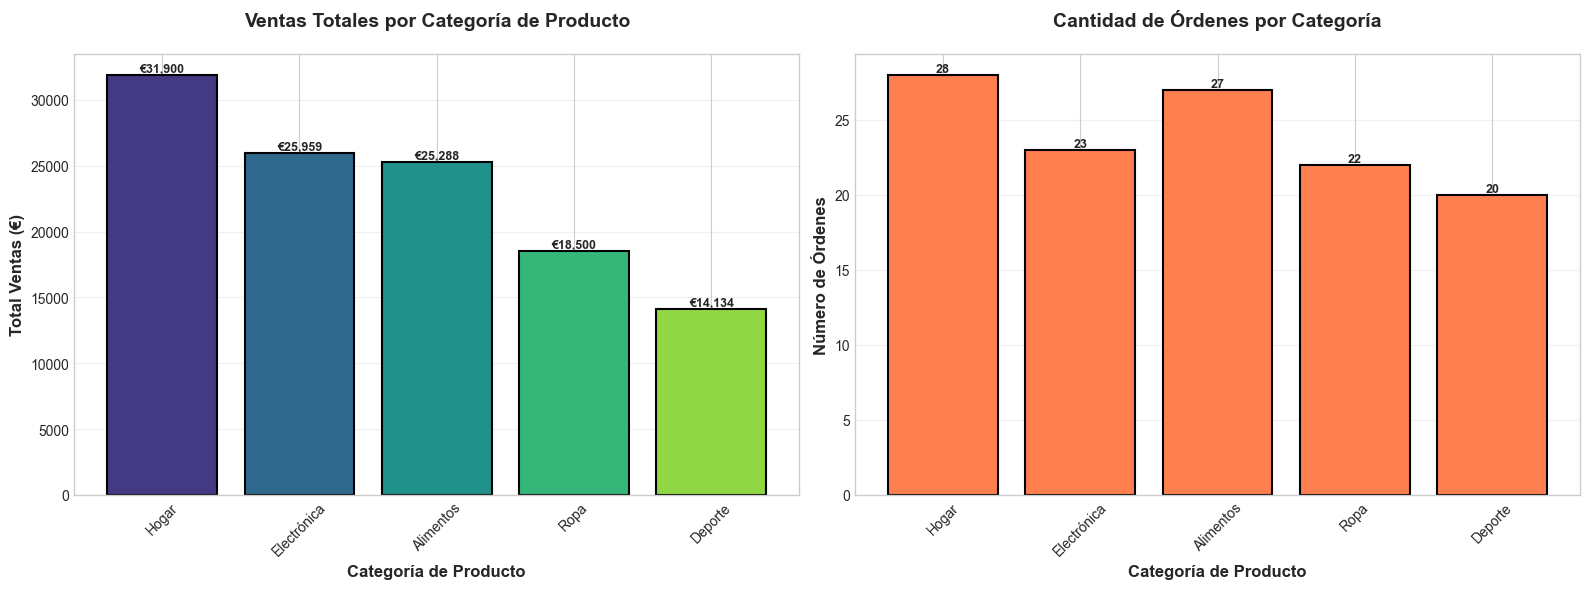


Resumen de Ventas por Categoría:
                  Total_Ventas  Num_Ordenes
product_category                           
Hogar                 31900.18           28
Electrónica           25958.93           23
Alimentos             25288.03           27
Ropa                  18500.22           22
Deporte               14134.11           20


In [29]:
# Preparar datos
ventas_categoria = df.groupby('product_category').agg({
    'total_amount': 'sum',
    'order_id': 'count'
}).round(2)
ventas_categoria.columns = ['Total_Ventas', 'Num_Ordenes']
ventas_categoria = ventas_categoria.sort_values('Total_Ventas', ascending=False)

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Total de ventas por categoría
ax1 = axes[0]
colors = sns.color_palette("viridis", len(ventas_categoria))
bars1 = ax1.bar(ventas_categoria.index, ventas_categoria['Total_Ventas'], 
                color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Ventas (€)', fontsize=12, fontweight='bold')
ax1.set_title('Ventas Totales por Categoría de Producto', fontsize=14, fontweight='bold', pad=20)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'€{height:,.0f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 2: Número de órdenes por categoría
ax2 = axes[1]
bars2 = ax2.bar(ventas_categoria.index, ventas_categoria['Num_Ordenes'], 
                color='coral', edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax2.set_ylabel('Número de Órdenes', fontsize=12, fontweight='bold')
ax2.set_title('Cantidad de Órdenes por Categoría', fontsize=14, fontweight='bold', pad=20)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nResumen de Ventas por Categoría:")
print(ventas_categoria)

### 3.1 Gráfico de Barras Agrupadas por Categoría y Método de Pago

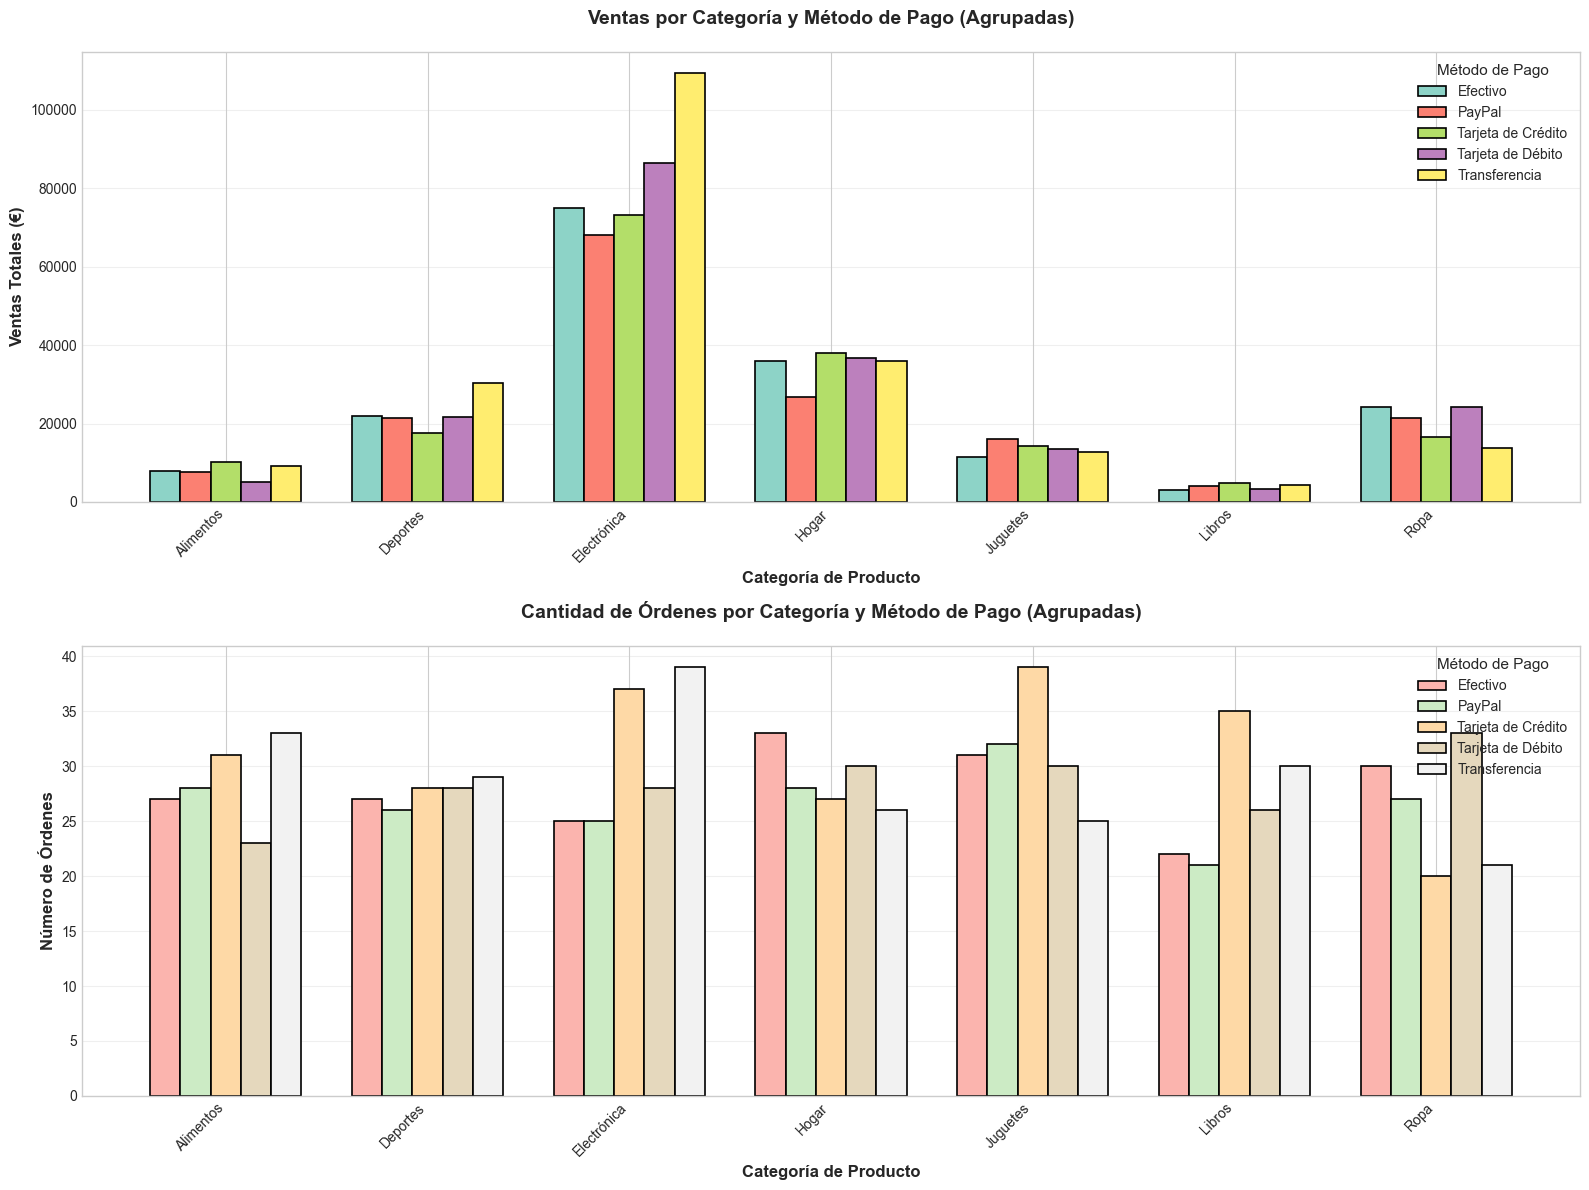


Ventas Agrupadas por Categoría y Método de Pago:
payment_method    Efectivo    PayPal  Tarjeta de Crédito  Tarjeta de Débito  \
product_category                                                              
Alimentos          7818.19   7761.63            10067.23            5119.41   
Deportes          21844.59  21299.34            17646.97           21699.72   
Electrónica       74935.75  68200.94            73238.64           86554.55   
Hogar             35903.75  26698.54            38036.58           36776.70   
Juguetes          11541.14  16082.22            14344.40           13527.89   
Libros             3103.83   4031.39             4941.81            3236.84   
Ropa              24325.35  21349.86            16441.21           24328.27   

payment_method    Transferencia  
product_category                 
Alimentos               9074.45  
Deportes               30332.20  
Electrónica           109349.82  
Hogar                  35881.13  
Juguetes               12824.05  


In [18]:
# Preparar datos agrupados por categoría y método de pago
ventas_agrupadas = df.groupby(['product_category', 'payment_method'])['total_amount'].sum().unstack(fill_value=0)
ordenes_agrupadas = df.groupby(['product_category', 'payment_method'])['order_id'].count().unstack(fill_value=0)

# Crear figura para barras agrupadas usando matplotlib.pyplot
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Barras agrupadas - Ventas por Categoría y Método de Pago
ax1 = axes[0]
categorias = ventas_agrupadas.index
metodos_pago = ventas_agrupadas.columns
x = np.arange(len(categorias))
width = 0.15  # Ancho de cada barra

# Crear barras para cada método de pago
colors = plt.cm.Set3(np.linspace(0, 1, len(metodos_pago)))
for i, metodo in enumerate(metodos_pago):
    offset = width * (i - len(metodos_pago)/2 + 0.5)
    bars = ax1.bar(x + offset, ventas_agrupadas[metodo], width, 
                   label=metodo, color=colors[i], edgecolor='black', linewidth=1.2)

ax1.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ventas Totales (€)', fontsize=12, fontweight='bold')
ax1.set_title('Ventas por Categoría y Método de Pago (Agrupadas)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(categorias, rotation=45, ha='right')
ax1.legend(title='Método de Pago', fontsize=10, title_fontsize=11, loc='upper right')
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Cantidad de órdenes por categoría y método de pago
ax2 = axes[1]
colors2 = plt.cm.Pastel1(np.linspace(0, 1, len(metodos_pago)))
for i, metodo in enumerate(metodos_pago):
    offset = width * (i - len(metodos_pago)/2 + 0.5)
    bars = ax2.bar(x + offset, ordenes_agrupadas[metodo], width, 
                   label=metodo, color=colors2[i], edgecolor='black', linewidth=1.2)

ax2.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax2.set_ylabel('Número de Órdenes', fontsize=12, fontweight='bold')
ax2.set_title('Cantidad de Órdenes por Categoría y Método de Pago (Agrupadas)', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(categorias, rotation=45, ha='right')
ax2.legend(title='Método de Pago', fontsize=10, title_fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nVentas Agrupadas por Categoría y Método de Pago:")
print(ventas_agrupadas)
print("\n" + "="*80)
print("\nÓrdenes Agrupadas por Categoría y Método de Pago:")
print(ordenes_agrupadas)

### 3.2 Gráfico de Barras Agrupadas Alternativo - Por Categoría con Descuentos

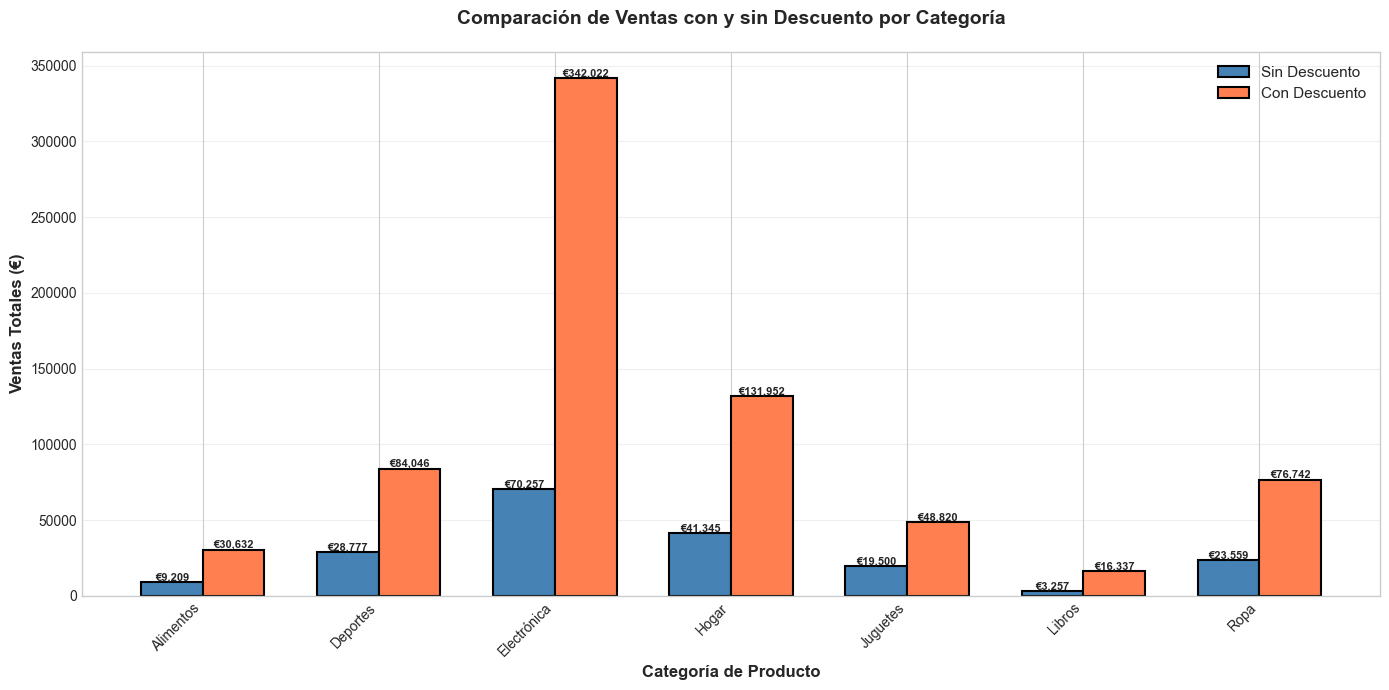


Ventas por Categoría según Descuento:
                  Sin Descuento  Con Descuento
product_category                              
Alimentos               9209.36       30631.55
Deportes               28777.26       84045.56
Electrónica            70257.32      342022.38
Hogar                  41344.93      131951.77
Juguetes               19499.80       48819.90
Libros                  3257.49       16336.86
Ropa                   23558.81       76741.72


Porcentaje de Ventas con Descuento:
                      Total  % Con Descuento
product_category                            
Alimentos          39840.91            76.88
Deportes          112822.82            74.49
Electrónica       412279.70            82.96
Hogar             173296.70            76.14
Juguetes           68319.70            71.46
Libros             19594.35            83.38
Ropa              100300.53            76.51


In [17]:
# Preparar datos: Ventas con y sin descuento por categoría
df['con_descuento'] = df['discount'] > 0
ventas_descuento = df.groupby(['product_category', 'con_descuento'])['total_amount'].sum().unstack(fill_value=0)
ventas_descuento.columns = ['Sin Descuento', 'Con Descuento']

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(ventas_descuento.index))
width = 0.35

bars1 = ax.bar(x - width/2, ventas_descuento['Sin Descuento'], width, 
               label='Sin Descuento', color='steelblue', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, ventas_descuento['Con Descuento'], width, 
               label='Con Descuento', color='coral', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax.set_ylabel('Ventas Totales (€)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Ventas con y sin Descuento por Categoría', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(ventas_descuento.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'€{height:,.0f}',
                   ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

print("\nVentas por Categoría según Descuento:")
print(ventas_descuento)

# Calcular porcentaje de ventas con descuento
ventas_descuento['Total'] = ventas_descuento['Sin Descuento'] + ventas_descuento['Con Descuento']
ventas_descuento['% Con Descuento'] = (ventas_descuento['Con Descuento'] / ventas_descuento['Total'] * 100).round(2)
print("\n" + "="*80)
print("\nPorcentaje de Ventas con Descuento:")
print(ventas_descuento[['Total', '% Con Descuento']])

## 4. Boxplot (Caja y Bigotes): Distribución de Precios

C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_3776\3871655730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='product_category', y='price', ax=ax1, palette='Set3')
C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_3776\3871655730.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='product_category', y='total_amount', ax=ax2, palette='coolwarm')
C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_3776\3871655730.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='product_category', y='deliv

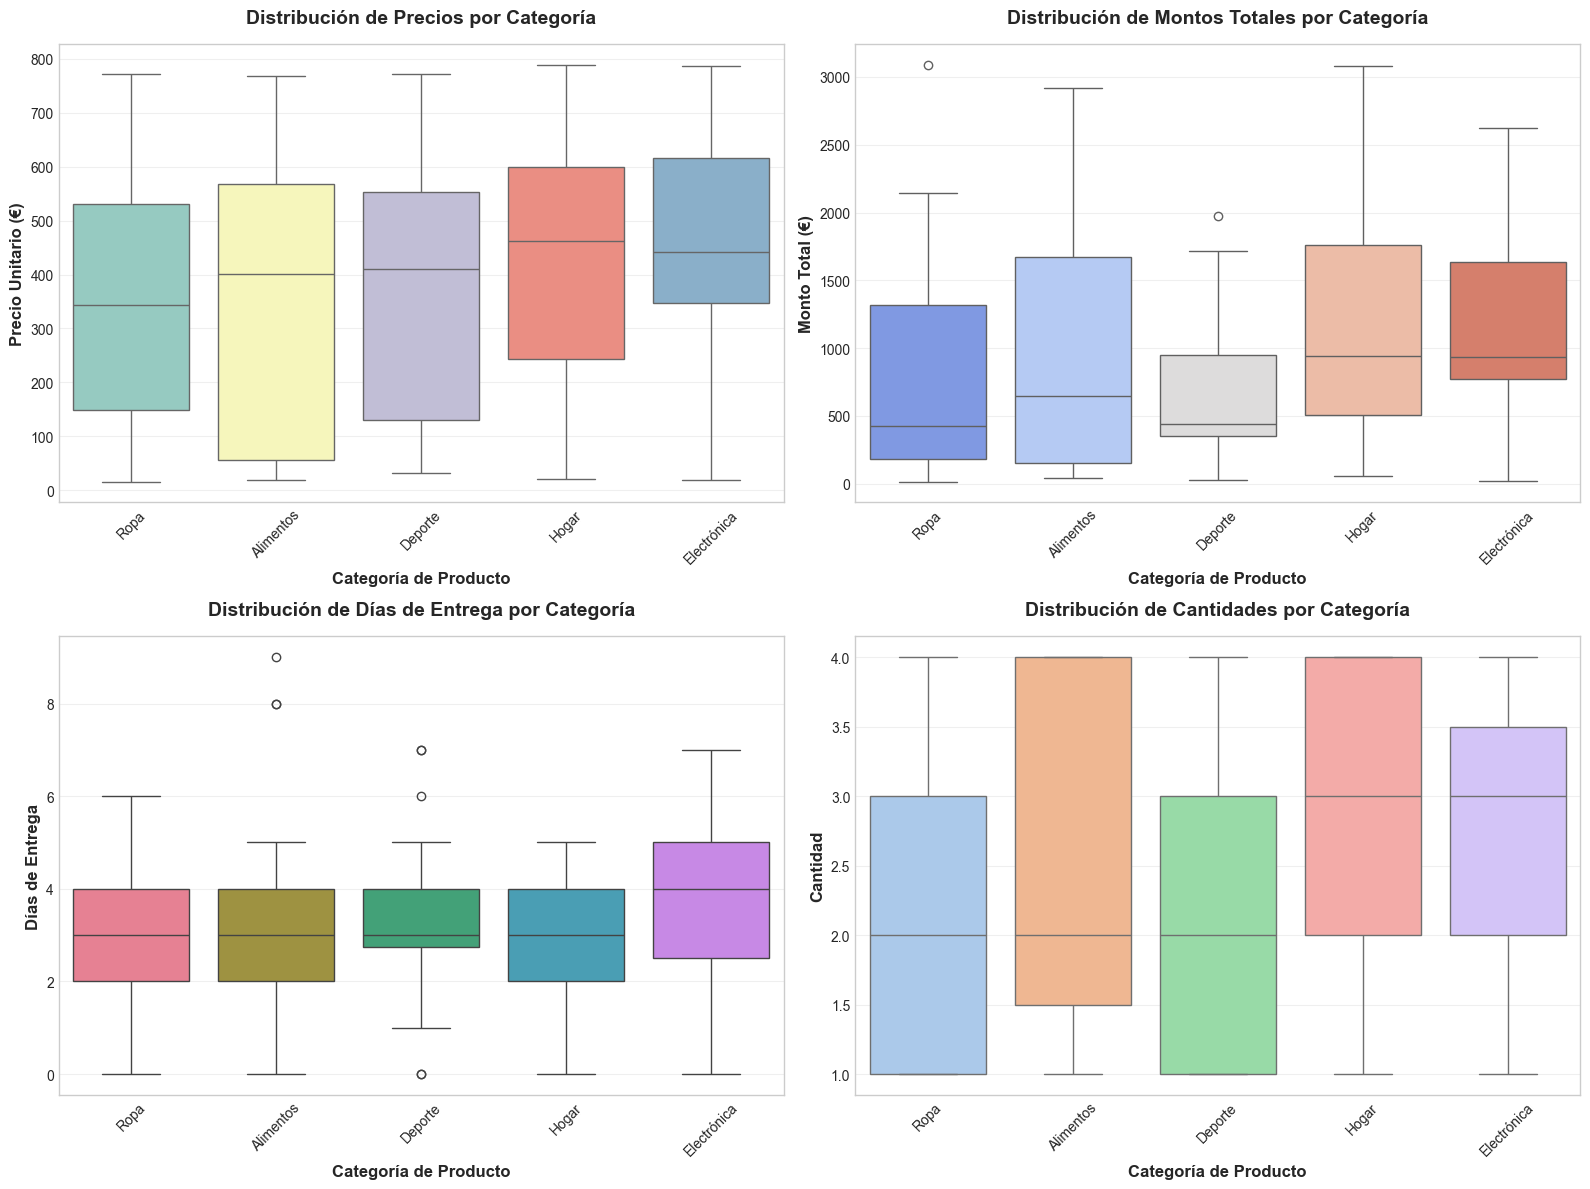


Estadísticas de Días de Entrega por Categoría:
                  Promedio  Mediana  Mínimo  Máximo  Desv. Estándar
product_category                                                   
Alimentos             3.19      3.0       0       9            2.30
Deporte               3.40      3.0       0       7            1.93
Electrónica           3.57      4.0       0       7            1.85
Hogar                 2.86      3.0       0       5            1.24
Ropa                  2.86      3.0       0       6            1.75


In [31]:
# Crear figura con múltiples boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot 1: Precio por categoría
ax1 = axes[0, 0]
sns.boxplot(data=df, x='product_category', y='price', ax=ax1, palette='Set3')
ax1.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precio Unitario (€)', fontsize=12, fontweight='bold')
ax1.set_title('Distribución de Precios por Categoría', fontsize=14, fontweight='bold', pad=15)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Boxplot 2: Total amount por categoría
ax2 = axes[0, 1]
sns.boxplot(data=df, x='product_category', y='total_amount', ax=ax2, palette='coolwarm')
ax2.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax2.set_ylabel('Monto Total (€)', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Montos Totales por Categoría', fontsize=14, fontweight='bold', pad=15)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Boxplot 3: Días de entrega por categoría (NUEVO)
ax3 = axes[1, 0]
sns.boxplot(data=df, x='product_category', y='delivery_days', ax=ax3, palette='husl')
ax3.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax3.set_ylabel('Días de Entrega', fontsize=12, fontweight='bold')
ax3.set_title('Distribución de Días de Entrega por Categoría', fontsize=14, fontweight='bold', pad=15)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Boxplot 4: Cantidad vendida por categoría
ax4 = axes[1, 1]
sns.boxplot(data=df, x='product_category', y='quantity', ax=ax4, palette='pastel')
ax4.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cantidad', fontsize=12, fontweight='bold')
ax4.set_title('Distribución de Cantidades por Categoría', fontsize=14, fontweight='bold', pad=15)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Mostrar estadísticas de días de entrega por categoría
print("\nEstadísticas de Días de Entrega por Categoría:")
print("="*80)
entrega_stats = df.groupby('product_category')['delivery_days'].agg([
    ('Promedio', 'mean'),
    ('Mediana', 'median'),
    ('Mínimo', 'min'),
    ('Máximo', 'max'),
    ('Desv. Estándar', 'std')
]).round(2)
print(entrega_stats)

## 5. Serie Temporal: Evolución de Ventas en el Tiempo

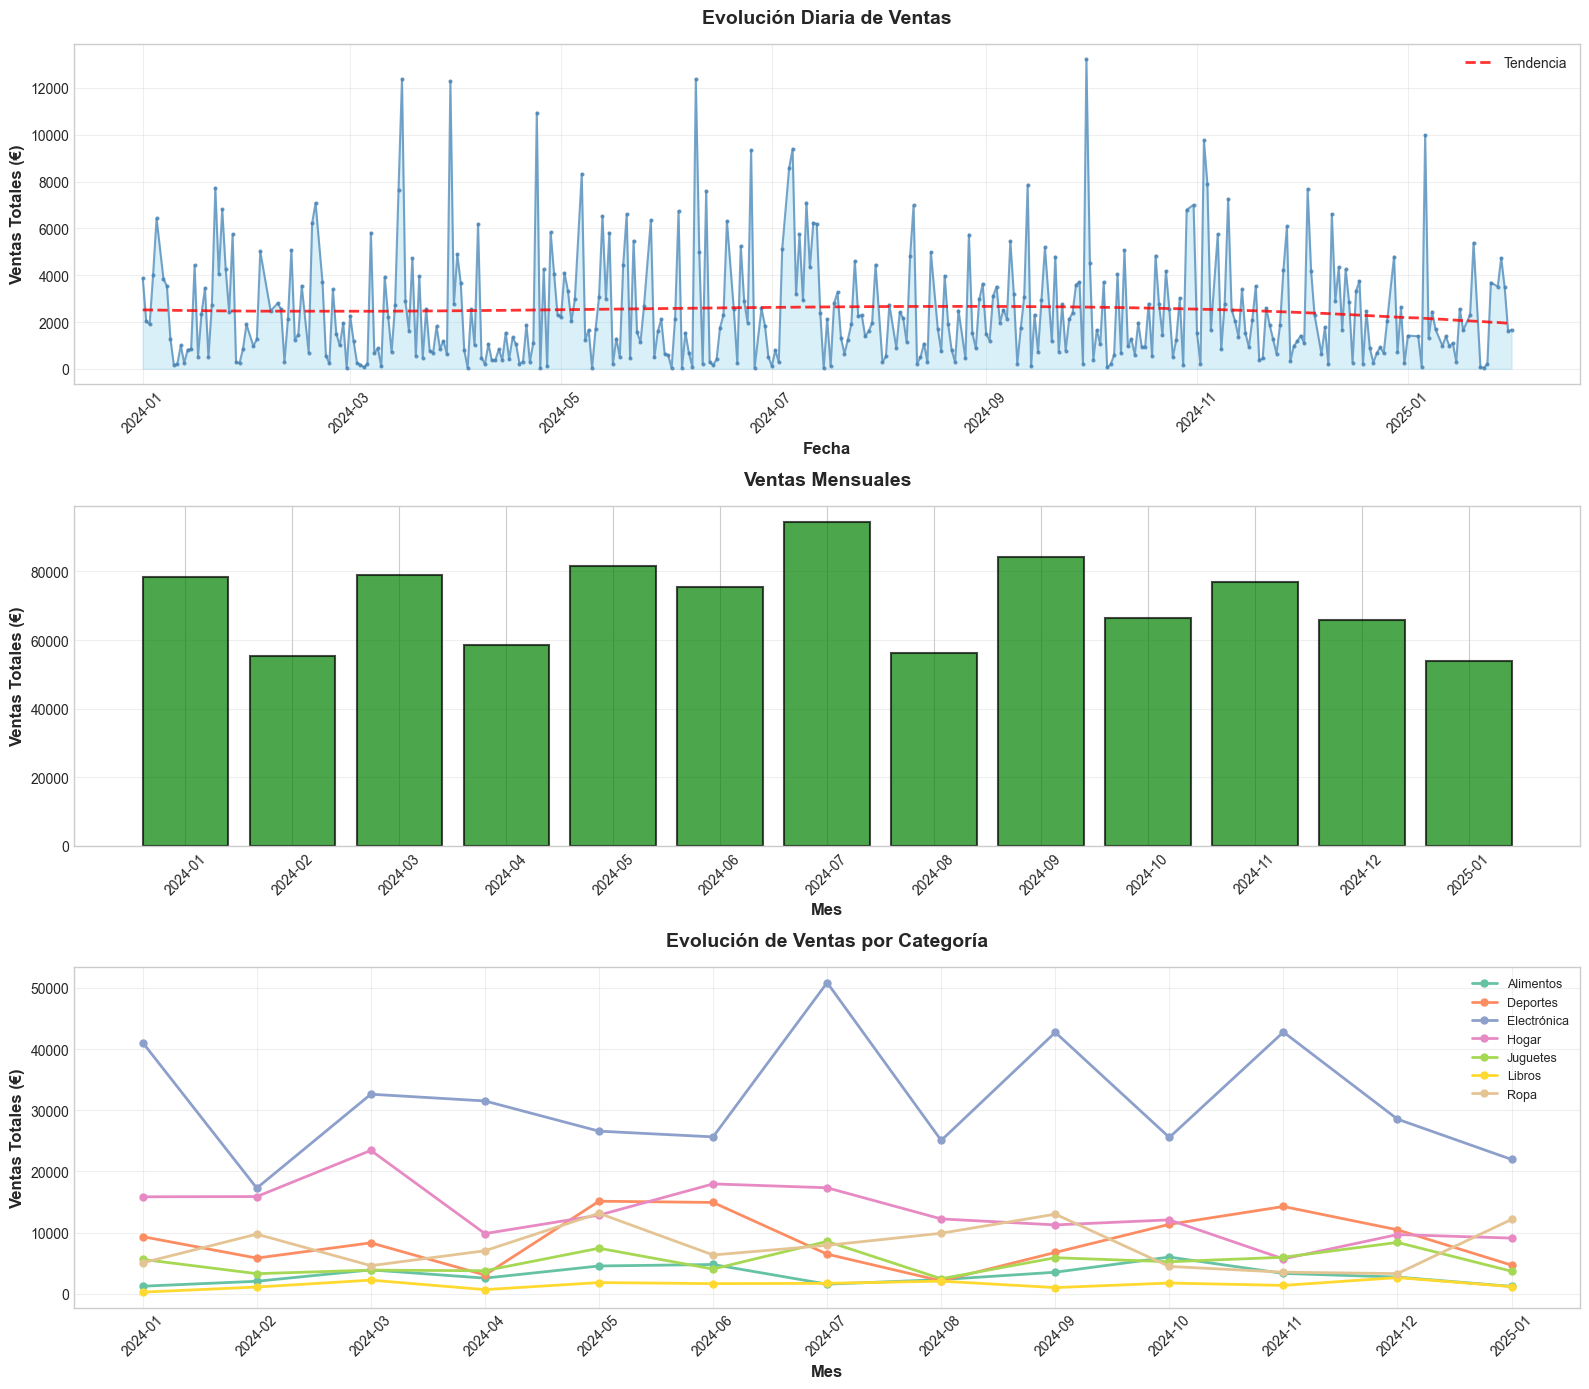


Resumen de Ventas Mensuales:
        Mes  Total_Ventas  Num_Ordenes
0   2024-01      78481.96           66
1   2024-02      55222.48           63
2   2024-03      79031.65           87
3   2024-04      58513.12           68
4   2024-05      81589.91           95
5   2024-06      75420.29           83
6   2024-07      94467.17           85
7   2024-08      56188.42           63
8   2024-09      84238.43           87
9   2024-10      66505.39           84
10  2024-11      76989.62           75
11  2024-12      65793.66           86
12  2025-01      54012.61           58


In [8]:
# Preparar datos temporales
df['year_month'] = df['date'].dt.to_period('M')
df['date_only'] = df['date'].dt.date

# Ventas diarias
ventas_diarias = df.groupby('date_only')['total_amount'].sum().reset_index()
ventas_diarias['date_only'] = pd.to_datetime(ventas_diarias['date_only'])

# Ventas mensuales
ventas_mensuales = df.groupby('year_month').agg({
    'total_amount': 'sum',
    'order_id': 'count'
}).reset_index()
ventas_mensuales.columns = ['Mes', 'Total_Ventas', 'Num_Ordenes']

# Crear figura
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Gráfico 1: Ventas diarias
ax1 = axes[0]
ax1.plot(ventas_diarias['date_only'], ventas_diarias['total_amount'], 
         linewidth=1.5, color='steelblue', marker='o', markersize=2, alpha=0.7)
ax1.fill_between(ventas_diarias['date_only'], ventas_diarias['total_amount'], 
                 alpha=0.3, color='skyblue')
ax1.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ventas Totales (€)', fontsize=12, fontweight='bold')
ax1.set_title('Evolución Diaria de Ventas', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Añadir línea de tendencia
z = np.polyfit(range(len(ventas_diarias)), ventas_diarias['total_amount'], 3)
p = np.poly1d(z)
ax1.plot(ventas_diarias['date_only'], p(range(len(ventas_diarias))), 
         "r--", linewidth=2, alpha=0.8, label='Tendencia')
ax1.legend()

# Gráfico 2: Ventas mensuales
ax2 = axes[1]
x_pos = range(len(ventas_mensuales))
ax2.bar(x_pos, ventas_mensuales['Total_Ventas'], 
        color='green', alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Mes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Ventas Totales (€)', fontsize=12, fontweight='bold')
ax2.set_title('Ventas Mensuales', fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([str(m) for m in ventas_mensuales['Mes']], rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Gráfico 3: Ventas por categoría en el tiempo
ax3 = axes[2]
ventas_cat_tiempo = df.groupby(['year_month', 'product_category'])['total_amount'].sum().unstack(fill_value=0)

for categoria in ventas_cat_tiempo.columns:
    ax3.plot(range(len(ventas_cat_tiempo)), ventas_cat_tiempo[categoria], 
            marker='o', linewidth=2, label=categoria, markersize=5)

ax3.set_xlabel('Mes', fontsize=12, fontweight='bold')
ax3.set_ylabel('Ventas Totales (€)', fontsize=12, fontweight='bold')
ax3.set_title('Evolución de Ventas por Categoría', fontsize=14, fontweight='bold', pad=15)
ax3.set_xticks(range(len(ventas_cat_tiempo)))
ax3.set_xticklabels([str(m) for m in ventas_cat_tiempo.index], rotation=45)
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResumen de Ventas Mensuales:")
print(ventas_mensuales)

## 6. Análisis de Descuentos y Retornos

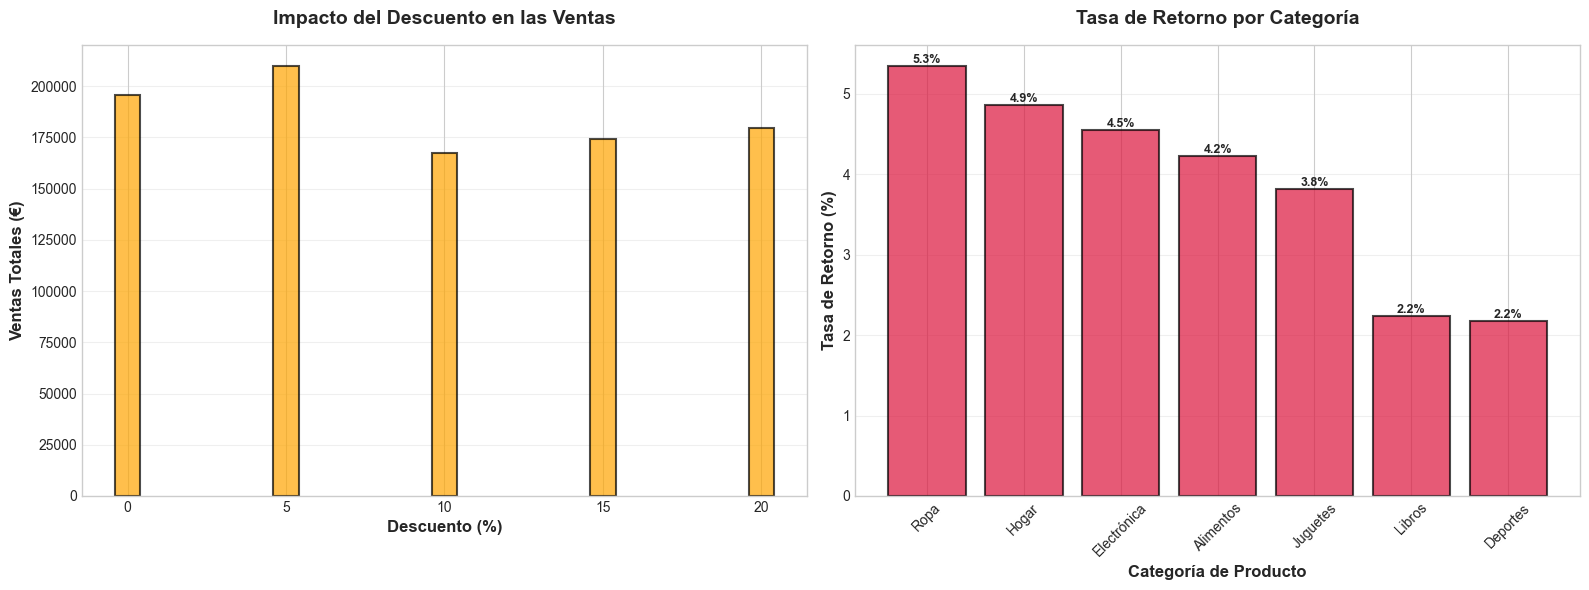


Estadísticas de Retornos:
                  sum  count  tasa
product_category                  
Ropa                7    131  5.34
Hogar               7    144  4.86
Electrónica         7    154  4.55
Alimentos           6    142  4.23
Juguetes            6    157  3.82
Libros              3    134  2.24
Deportes            3    138  2.17


In [9]:
# Análisis de descuentos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ventas por nivel de descuento
ax1 = axes[0]
ventas_descuento = df.groupby('discount')['total_amount'].sum().reset_index()
ax1.bar(ventas_descuento['discount'] * 100, ventas_descuento['total_amount'], 
        color='orange', alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Descuento (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ventas Totales (€)', fontsize=12, fontweight='bold')
ax1.set_title('Impacto del Descuento en las Ventas', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Tasa de retorno por categoría
ax2 = axes[1]
retornos_cat = df.groupby('product_category')['returned'].agg(['sum', 'count'])
retornos_cat['tasa'] = (retornos_cat['sum'] / retornos_cat['count'] * 100).round(2)
retornos_cat = retornos_cat.sort_values('tasa', ascending=False)

bars = ax2.bar(retornos_cat.index, retornos_cat['tasa'], 
               color='crimson', alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Categoría de Producto', fontsize=12, fontweight='bold')
ax2.set_ylabel('Tasa de Retorno (%)', fontsize=12, fontweight='bold')
ax2.set_title('Tasa de Retorno por Categoría', fontsize=14, fontweight='bold', pad=15)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nEstadísticas de Retornos:")
print(retornos_cat)

## 7. Conclusiones

**Hallazgos principales:**

1. **Categorías más rentables:** Análisis de barras muestra qué categorías generan más ingresos
2. **Distribución de precios:** Los boxplots revelan la variabilidad de precios y outliers
3. **Tendencias temporales:** Las series temporales muestran patrones estacionales y tendencias
4. **Descuentos:** Relación entre descuentos ofrecidos y volumen de ventas
5. **Retornos:** Identificación de categorías con mayores tasas de devolución

**Recomendaciones:**
- Enfocarse en categorías con mejor margen y menor tasa de retorno
- Optimizar estrategias de descuento basadas en datos históricos
- Analizar picos de ventas para planificar inventario